In [23]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

## Task 3

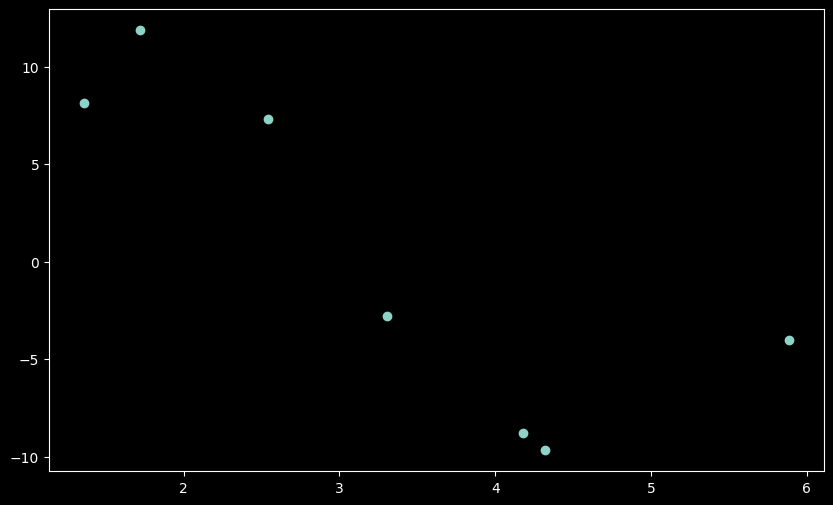

In [24]:
np.random.seed(123)
n = 7
x = np.random.uniform(0, 6, n)

def y(x_dots):
    y_dots = 10 * np.sin(x_dots)
    epsilon = np.random.normal(0, 1, len(x_dots))
    return y_dots + epsilon

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.scatter(x, y(x))
plt.show()

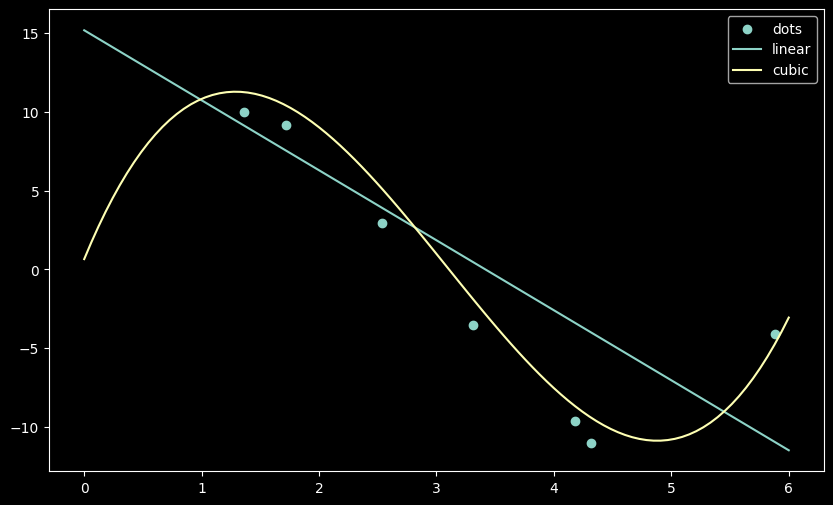

In [25]:
linear = np.poly1d(np.polyfit(x, y(x), 1))
cubic = np.poly1d(np.polyfit(x, y(x), 3))

sample = np.linspace(0, 6, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y(x), label = 'dots')
plt.plot(sample, linear(sample), label = 'linear')
plt.plot(sample, cubic(sample), label = 'cubic')
plt.legend()
plt.show()

## Task 4

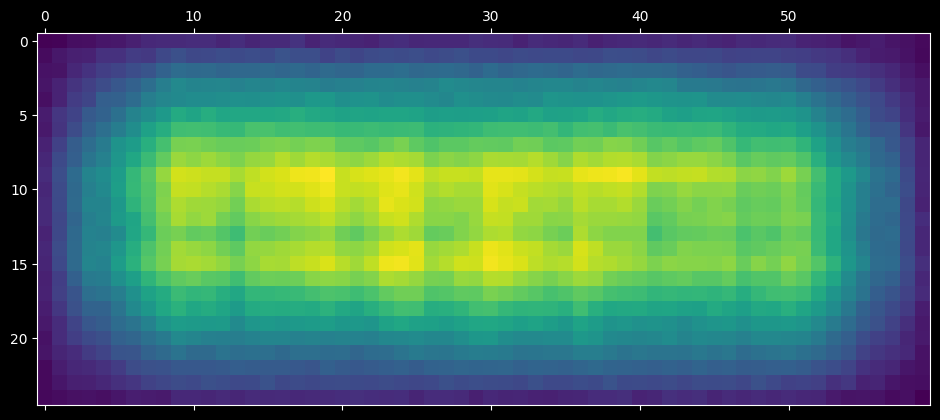

In [26]:
with np.load('../data/data.npz') as data:
    A, C = data['A'], data['C']

def mat2vec(A):
    A = np.flipud(A)
    a = np.reshape(A, np.prod(A.shape))
    return a

def vec2mat(a, shape):
    A = np.reshape(a, shape)
    A = np.flipud(A)
    return A

plt.matshow(A, fignum=None)

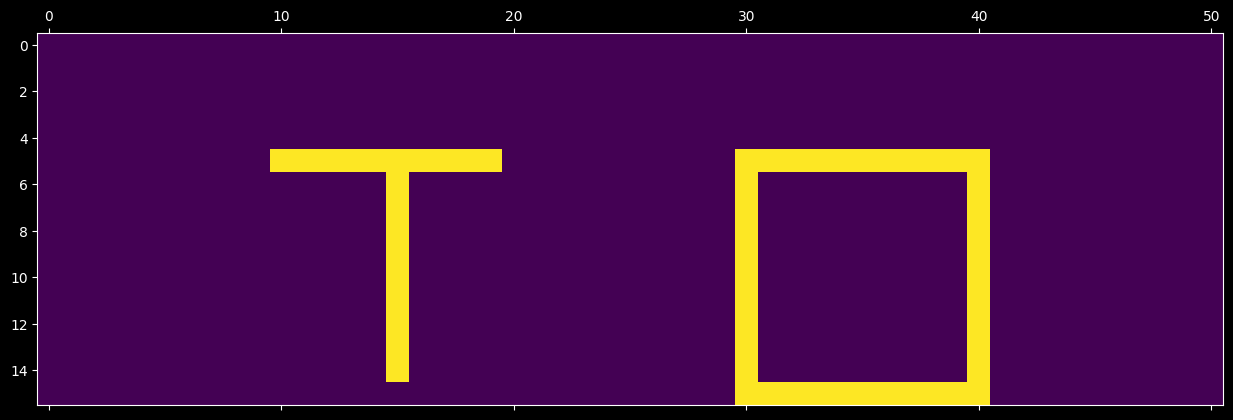

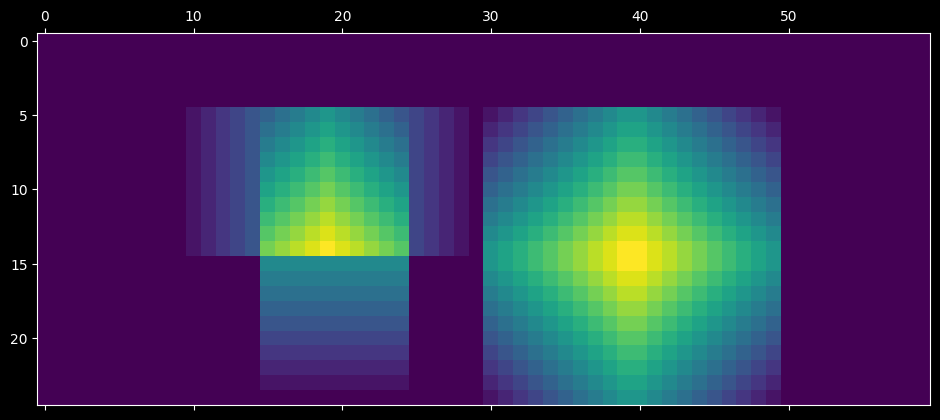

In [27]:
# how C affects A
Test = np.zeros((16,51))
Test[5:15,15] = 1
Test[5:15,30] = 1
Test[5:15,40] = 1
Test[5,10:20] = 1
Test[5,30:41] = 1
Test[15,30:41] = 1
plt.matshow(Test)
plt.show()
test = mat2vec(Test)
plt.matshow(vec2mat(C @ test, (25, 60)));

Каждое большое значение в матрице (светлый пиксель) размывается в прямоугольную область с меньшим средним значением (менее яркий, чем начальный пиксель).

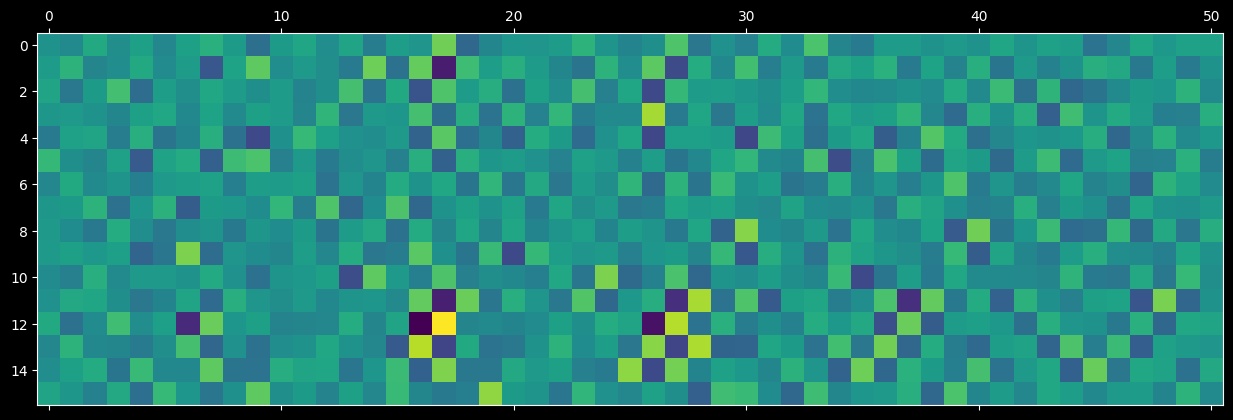

In [28]:
a = mat2vec(A)
a0 = np.linalg.pinv(C) @ a
A0 = vec2mat(a0, (16, 51))
plt.matshow(A0);

(1500, 816)
(816,)


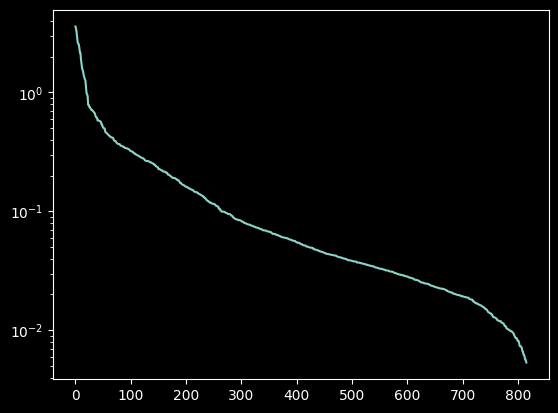

In [35]:
u, s, vh = np.linalg.svd(C, full_matrices=False)
print(C.shape)
print(s.shape)
plt.plot(s)
plt.yscale('log');

10 singular numbers


<Figure size 500x200 with 0 Axes>

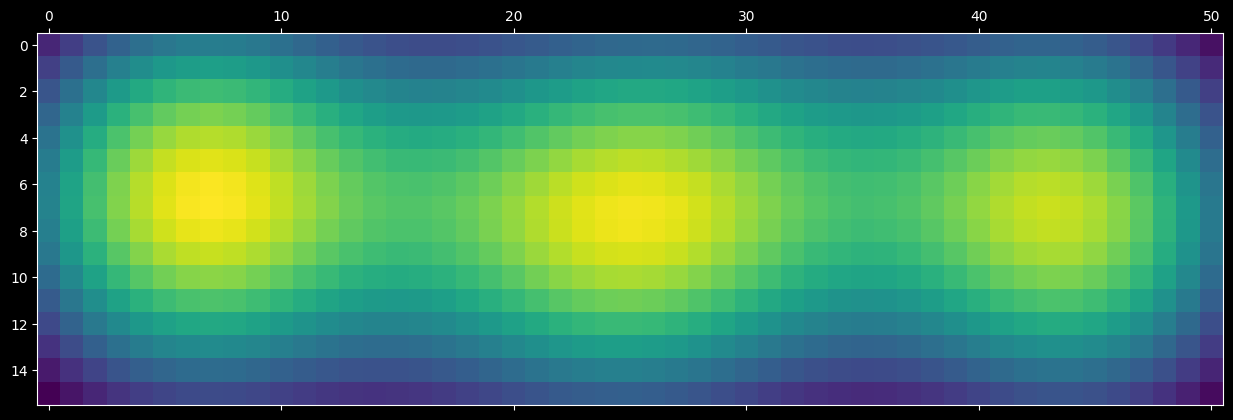

110 singular numbers


<Figure size 500x200 with 0 Axes>

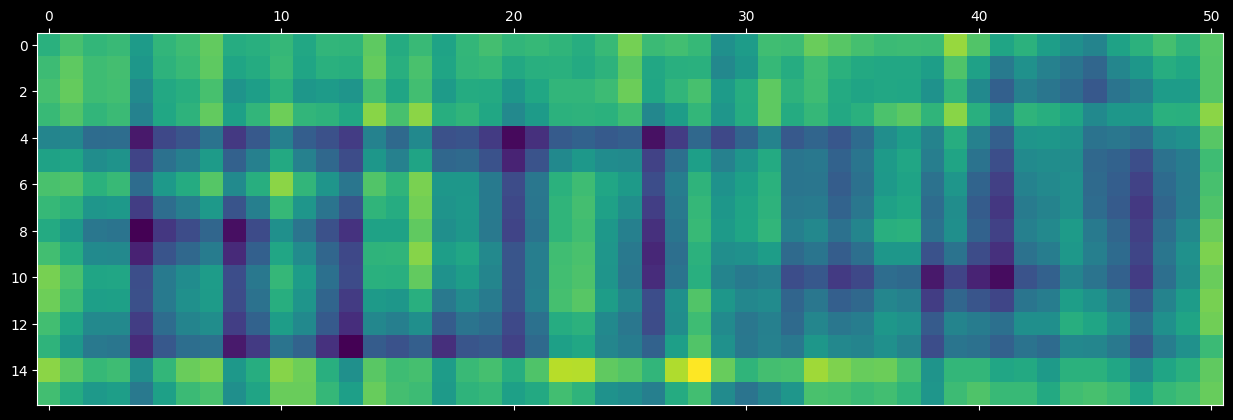

210 singular numbers


<Figure size 500x200 with 0 Axes>

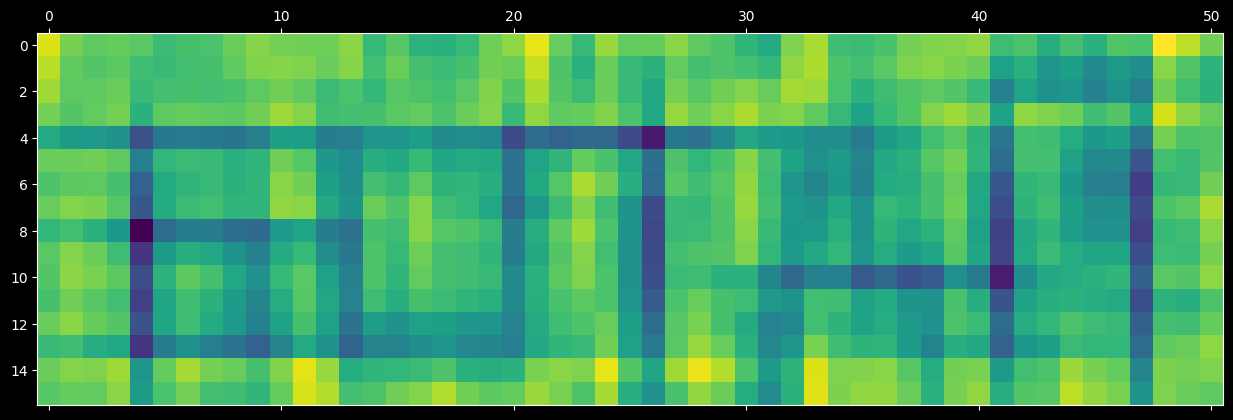

310 singular numbers


<Figure size 500x200 with 0 Axes>

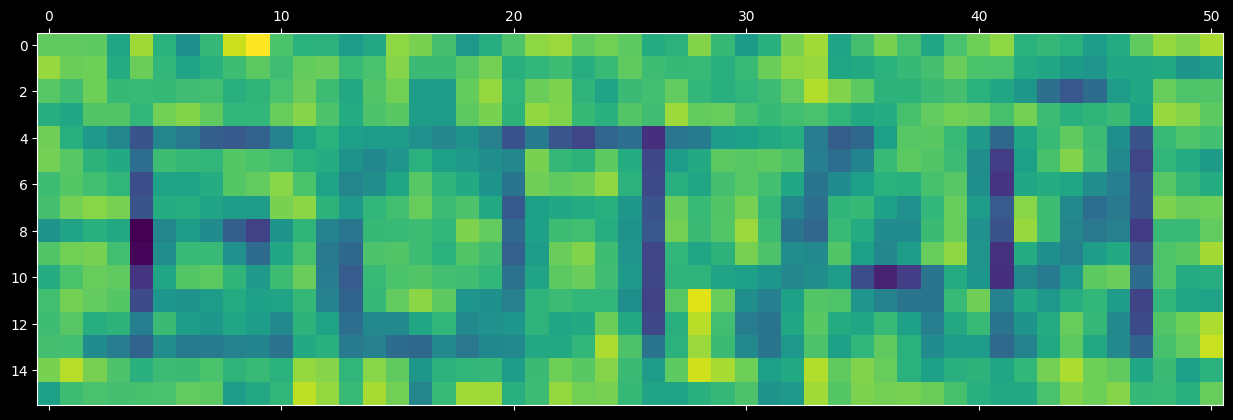

410 singular numbers


<Figure size 500x200 with 0 Axes>

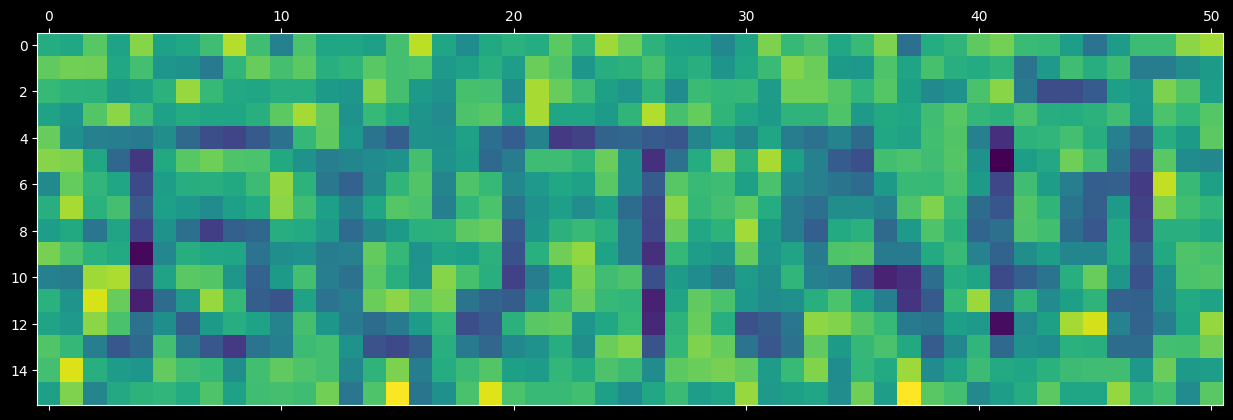

In [43]:
N = s.shape[0]
def plot(N):
    s0 = np.zeros(816)
    print(f'{N} singular numbers')
    s0[:N] = s[:N]
    C0 = np.dot(u, np.dot(np.diag(s0), vh))
    A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
    plt.matshow(A0_guess)
    plt.show()

for size in range(10, 510, 100):
    plot(size)

Очевидно, что 10 сингулярных значений - оптимальное количество, так как там не надо ботать)